# Lecture 3 - Conditional Probability, Total Probability

Summary from last class:

1. Defined a **probabilistic model**, a mathematical description to characterize *uncertainty*. A probabilistic model is the triple $(\Omega,\mathcal{F},P)$, where $\Omega$ is the sample space, $\mathcal{F}$ is the event class and $P$ is a real-valued function that maps all elements of $\mathcal{F}$ onto $\mathbb{R}$.

2. Defined **axioms of probability**:
    * $\forall E\in\mathcal{F}, P(E)\geq 0$
    * $P(\Omega)=1$
    * $\forall E, F \in \mathcal{F}, P(E\cup F) = P(E) + P(F)$ if $E$ and $F$ are mutually exclusive, that is, $E\cap F =\emptyset$
    * If $A_1,A_2,\dots$ is a sequence of event such that $A_i\cap A_j = \emptyset, \forall i\neq j$, then

$$P\left(\bigcup_{k=1}^{\infty} A_k\right) = \sum_{k=1}^{\infty} P(A_k)$$

3. Derived **corollaries** from these axioms:
    * $P(A^c) = 1 - P(A)$
    * $P(A) \leq 1$
    * $P(\emptyset) = 0 $
    * $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
    * If $A\subset B$, then $P(A)\leq P(B)$
    * If $A_1,A_2,\dots,A_n$ are pairwise mutually exclusive, then $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_k)$. Proof is by induction.
    * $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_j) - \sum_{j<k} P(A_j\cap A_k) + \dots + (-1)^{(n+1)}P(A_1\cap A_2 \cap \dots\cap A_n)$
    
4. Learned that an experiment is **fair** if every outcome is equally likely.

5. Defined probability as a measure of frequency of occurrence (**frequentist view**). When the sample space $\Omega$ has a finite number of equally likely outcomes, the probability of an event $E\subset \Omega$, is given by 
$$P(E) = \frac{|E|}{|\Omega|} = \frac{\text{number of elements in }E}{\text{number of elements in }\Omega}$$

___

# Discrete and Continuous Probabilistic Models

## Discrete Sequential Models

A **sequential model** is a type of experiment that has an inherent sequential character. For example:

* Flipping a coin 3 times
* Receiving eight successive digits at a communication receiver
* Observing the value of a stock on five successive days

This type of models are also characterized by probabilistic model that must obey the set of axioms and derived corollaries.

It is often useful to describe a sequential model experiment in a **tree-based sequential description**. 

**Let's use the virtual whiteboard to work through some examples to demonstrate the tree-based description of this type of experiments.**

**<font color=blue>Example 1:</font>** Consider the experiment where we flip a fair coin 2 times.

* What is the sample space? Remember that different elements of the sample space should be distinct and mutually exclusive.
* What is the probability for each possible outcome?

**<font color=blue>Example 2:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$observing a 1 or 2 on either roll.

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

In [5]:
import random
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
num_sims = 1_000
event_counter=0

for i in range(num_sims):
    die1 = random.choice(range(1,7))
    die2 = random.choice(range(1,7))
    if die1<=2:
        event_counter += 1
    if die2<=2:
        event_counter += 1
        if die1 <= 2:
            event_counter -= 1
    
print("Probability of getting a 1 or 2 on either roll \
when rolling a fair 6-sided die twice= ", 
     event_counter/num_sims)
print('True probability is ', 20/36)

Probability of getting a 1 or 2 on either roll when rolling a fair 6-sided die twice=  0.538
True probability is  0.5555555555555556


In [11]:
# Alternatively

num_sims=10
dice = npr.randint(1,7,size=(2,num_sims))
dice

array([[3, 5, 5, 3, 2, 2, 3, 3, 1, 4],
       [1, 6, 3, 6, 3, 1, 1, 3, 6, 2]])

In [12]:
dice<=2

array([[False, False, False, False,  True,  True, False, False,  True,
        False],
       [ True, False, False, False, False,  True,  True, False, False,
         True]])

In [13]:
np.sum(dice<=2,axis=0)

array([1, 0, 0, 0, 1, 2, 1, 0, 1, 1])

In [14]:
np.sum(dice<=2,axis=0)>=1

array([ True, False, False, False,  True,  True,  True, False,  True,
        True])

In [15]:
np.sum(np.sum(dice<=2,axis=0)>=1)

6

In [17]:
num_sims=10_000
dice = npr.randint(1,7,size=(2, num_sims))
event=np.sum(np.sum(dice<=2,axis=0)>=1)


print("Probability of getting a 1 or 2 on either roll \
when rolling a fair 6-sided die twice= ", 
     event/num_sims)
print('True probability is ', 20/36)

Probability of getting a 1 or 2 on either roll when rolling a fair 6-sided die twice=  0.5606
True probability is  0.5555555555555556


**<font color=blue>Example 3:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$at least one roll is 4. (Try by yourselves!)

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

In [18]:
num_sims = 100000
event = 0
for i in range(num_sims):
    die1 = random.choice(range(1,7))
    die2 = random.choice(range(1,7))
    if die1 == 4:
        event+=1
    if die2 ==4:
        event +=1
        if die1 == 4:
            event -= 1
            
print("Probability of getting at one roll as 4 when rolling a fair 6-sided die twice= ", 
     event/num_sims)
print('True probability is ', 11/36)

Probability of getting at one roll as 4 when rolling a fair 6-sided die twice=  0.30616
True probability is  0.3055555555555556


In [19]:
# Alternatively

num_sims=10

dice = npr.randint(1,7, size=(2, num_sims))
dice

array([[2, 3, 1, 4, 3, 2, 1, 6, 6, 1],
       [6, 2, 2, 3, 5, 1, 4, 3, 4, 5]])

In [20]:
dice==4

array([[False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False,  True,
        False]])

In [21]:
np.sum(dice==4, axis=0)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [22]:
np.sum(np.sum(dice==4, axis=0)>=1)

3

In [23]:
num_sims=10_000
dice=npr.randint(1,7,size=(2,num_sims))
event = np.sum(np.sum(dice==4, axis=0)>=1)

print("Probability of getting at one roll as 4 when rolling a fair 6-sided die twice= ", 
     event/num_sims)
print('True probability is ', 11/36)

Probability of getting at one roll as 4 when rolling a fair 6-sided die twice=  0.3052
True probability is  0.3055555555555556


**<font color=blue>Example 4:</font>** Consider the experiment where we flip a fair coin 3 times and the event $E\equiv$observing heads in the 2nd flip.

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

In [30]:
num_sims=1_000
coin=['H','T']
event=0

# 'H' - 1 and 'T' - 0

coins = npr.randint(2,size=(3, num_sims))
coins

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [31]:
coins[1,:]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [32]:
np.sum(coins[1,:]==1)

504

In [33]:

coins = npr.randint(2,size=(3,num_sims))
event = np.sum(coins[1,:]==1)

print("Probability of flipping a fair coin 3 times and observing heads in the 2nd flip= ", 
     event/num_sims)
print('True probability is ', 4/8)

Probability of flipping a fair coin 3 times and observing heads in the 2nd flip=  0.513
True probability is  0.5


**<font color=blue>Example 5:</font>** Consider the experiment where we flip a fair coin 3 times, the sub-experiment of counting how many times is came up heads, and the event $E\equiv$it came up heads 2 times.

* What is the sample space of the experiment?
* What is the sample space of the sub-experiment?
* What are the outcomes of this sub-experiment?
* What is the probability of event $E$?

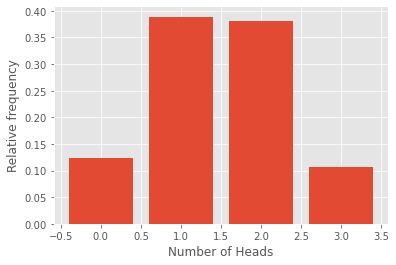

In [37]:
num_sims = 1_000

coins = npr.randint(2,size=(3,num_sims))
num_heads = np.sum(coins==1, axis=0)


vals, counts = np.unique(num_heads, return_counts=True)

plt.bar(vals, counts/num_sims)
plt.xlabel('Number of Heads')
plt.ylabel('Relative frequency');

In [38]:
num_sims=1_000

coins = npr.randint(2, size=(3, num_sims))
event= np.sum(np.sum(coins==1, axis=0)==2)

print("Probability of flipping a fair coin 3 times and observing 2 heads = ", 
     event/num_sims)
print('True probability is ', 3/8)

Probability of flipping a fair coin 3 times and observing 2 heads =  0.389
True probability is  0.375


## Continuous Models

The way that continuous models differ from discrete ones is that the probabilities of single-element events may not be sufficient to characterize the probability law.

**For example:** a wheel of fortune is continuously calibrated from 0 to 1, so the possible outcomes of an experiment consisting of a single spin are the numbers in the interval $\Omega=[0,1]$. 
* Assuming a fair wheel, it is appropriate to consider all outcomes equally likely, but what is the probability of the event consisting of a single element? say 0.472927028..?
* If possible events are mutually exclusive, then using the 3rd axiom of probability (also called the **Additivity axiom**), it would follow that events with a sufficiently large number of elements would have probability larger than 1.
* Therefore, the probability of any event that consists of a single element **must** be 0.
* It makes sense then to assign a probability of $b-1$ to any sub-interval $[a,b]$ of $[0,1]$, and to calculate the probability of a more complicated set by evaluating its "length". This satisfies all axioms of probability and qualifies as a legitimate probability model.

___

## Introduction to Conditional Probability

Consider the following scenarios:

**<font color=blue>Example 6:</font> A magician has in her pocket a fair coin and a two-headed coin. She chooses one at random and flips it. What is the probability that the result is heads?**

* Is this experiment fair? <!-- No, because the probability of each outcome (H, T) are not equal. P(H)=3/4 and P(T)=1/4 -->

Let's compute this probability on the virtual whiteboard.

Let's build a simulation to answer this:

In [39]:
def one_flip(num_sims=100_000):
    coins = ['fair', '2-headed']
    head_count = 0
    for sim in range(num_sims):
        coin = random.choice(coins) # select a coin at random
        if coin=='fair':
            S=['H','T']
        else:
            S=['H','H']
        value = random.choice(S)
        if value=='H':
            head_count+=1
    print('Probability of head is ', head_count/num_sims)

In [40]:
one_flip()

Probability of head is  0.74981


**<font color=blue>Example 7:</font> Suppose that she chooses a coin at random. Using that coin, she flips it once and observes heads. What is the probability of observing heads in the second flip (using the same coin) if we observed heads in the first flip?**

* How can we visualize and compute the analytical probability of this event?

Let's compute this probability on the virtual whiteboard.

In [2]:
def double_flip(num_sims=100_000):
    coins = ['fair', '2-headed']
    heads1_count = 0
    heads2_count = 0
    for sim in range(num_sims):
        coin = random.choice(coins)
        if coin == 'fair':
            S = ['H','T']
        else:
            S = ['H', 'H']
        values = random.choices(S, k=2) 
        if values[0]=='H':
            heads1_count+=1
            if values[1] == 'H':
                heads2_count+=1
                
    print('Probability of obs. heads in the 2nd flip \
    given heads in the 1st flip is ~', heads2_count/heads1_count)

In [3]:
double_flip()

Probability of obs. heads in the 2nd flip     given heads in the 1st flip is ~ 0.8339339139684862


This probability is called **conditional probability** as it provides us a way to reason about the outcome of an experiment, based on **partial information**.

Consider the event $H_i=$heads on flip i. We are asking what is the **probability of $H_2$ given $H_1$ occurred**, that is,

$$P(H_2 | H_1) = \frac{5}{6}$$

Consider the Venn diagram:

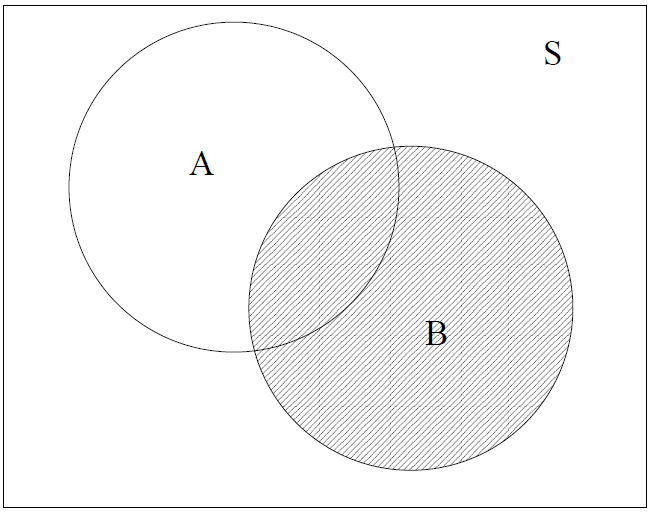

In [1]:
from IPython.display import Image
Image("figures/condProb1.png", width=500)

If we **condition** on $B$ having occurred, then we can form the new Venn diagram:

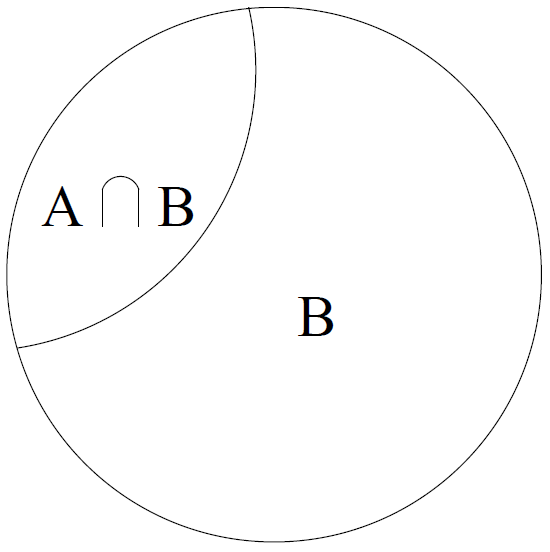

In [2]:
Image("figures/condProb2.png", width=300)

This diagram suggests that if $A\cap B=\emptyset$ then if $B$ occurs, $A$ could not have occurred.

Similarly if $B\subset A$, then if $B$ occurs, the diagram suggests that $A$ must have occurred.

A definition of conditional probability that agrees with these and other observations is:

<div class="alert alert-info" role="alert">
  <strong>Conditional Probability</strong>
    
For $A\in\mathcal{F}$, $B\in\mathcal{F}$, the **conditional probability** of event $A$ *given* event $B$ occurred is
    
$$P(A|B) = \frac{P(A\cap B)}{P(B)},\text{ for }P(B)>0$$ 
</div>

**Claim: If $P(B)>0$, the conditional probability $P(\bullet|B)$ satisfies the axioms on the original sample space $(\Omega,\mathcal{F},P(\bullet|B))$.**

<div class="alert alert-info" role="alert">
For a fixed event $B\neq\emptyset$, the conditional probabilities $P(A|B)$ form a legitimate probability law that satisfies the three axioms!
</div>

<div class="alert alert-warning">
    <b>Relating Conditional and Unconditional Probabilities</b>
    
Which of the following statement is true?

1. $P(A|B) \geq P(A)$
2. $P(A|B) \leq P(A)$
3. Not necessarily 1 or 2
</div>

**<font color=blue>Example 8:</font> A computer lab contains**

* **two computers from manufacturer A, one of which is defective**
* **three computers from manufacturer B, two of which are defective**
    
**A user sits down at a computer at random. Let the properties of the computer she sits down at be denoted by a two letter code, where the first letter is the manufacturer and the second letter is D for a defective computer or N for a non-defective computer. (We add a subscript to differentiate computers with the same two-letter code.)**

* What is the sample space?

$$\Omega = \{AD, AN, BD_1, BD_2, BN\}$$

Let
* $E_A$ be the event that the selected computer is from manufacturer A
* $E_B$ be the event that the selected computer is from manufacturer B
* $E_D$ be the event that the selected computer is defective

Let's find

$$P(E_A) = \frac{2}{5}$$

$$P(E_B) = \frac{3}{5}$$

$$P(E_D) = \frac{3}{5}$$

Now, suppose that I select a computer and tell you its manufacturer. Does that influence the probability that the computer is defective?

* For example, I tell you the computer is from manufacturer A. Then what is the probability that it is defective?

$$P(E_D | E_A) = \frac{P(E_D \cap E_A)}{P(E_A)} = \frac{1}{2}$$

* Let's find:

$$P(E_D | E_B) = \frac{2}{3}$$

$$P(E_A | E_D) = \frac{1}{3}$$

$$P(E_B | E_D) = \frac{2}{3}$$

## Conditional Probability for Discrete Sample Spaces with Equal Probabilities

Consider again our simulation of the magician's coins.

We directly estimated of those outcomes where the first flip was heads what proportion was the second flip heads. I.e., we did not use the definition of conditional probability, which involves a ratio of probabilities.

How does that work out?

Let $H_i$ be the event that the outcome of the $i$th flip was heads. We were trying to estimate $P(H_2|H_1)$.

If we were to use the definition of conditional probability, then we would find this as

$$P(H_2|H_1) = \frac{P(H_2\cap H_1)}{P(H_1)}$$

If we didn't know how to solve these analytically, we could estimate them by their relative frequencies. Let:

* $N$ be the number of simulations,
* $N_1$ be the number of simulations in which the first flip is heads, and
* $N_{12}$ be the number of simulations in which both flips are heads.

Then

\begin{align*}
P(H_2|H_1) &= \frac{N_{12}/N}{N_1/N} \\
&= \frac{N_{12}}{N_1}
\end{align*}

**<font color=blue>Example 9:</font> XOR of two independent binary values.**

**Flip a fair coin with sides labeled '0' and '1' two times.**
* **Let $E_i$ denote a '1' on the top face on flip $i$.**
* **Let $F_i$ denote a '0' on the top face on flip $i$.**
* **Let $G$ denote the event that the XOR of the values observed on the top faces on the two flips is '1'.**

Compute:

$$P(E_1) = \frac{1}{2}, P(E_2) = \frac{1}{2}, P(F) = \frac{1}{2}$$

$$P(E_1|E_2) = \frac{1}{2}$$
$$P(E_2|E_1) = \frac{1}{2}$$
$$P(G|E_1) = \frac{1}{2}$$

and

$$P(G|E_1\cap E_2) = 0$$

# Chain Rule - Using Conditional Probability to Decompose Events

Let's use the **virtual whiteboard** to depict how we can decompose conditional probability using a tree-based sequential representation.

In general, note that:

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
$$\Rightarrow P(A\cap B) = P(A|B)P(B)$$

and

$$P(B|A) = \frac{P(A\cap B)}{P(A)}$$
$$\Rightarrow P(A\cap B) = P(B|A)P(A)$$

These equations $P(A\cap B) = P(A|B)P(B)$ and $P(A\cap B) = P(B|A)P(A)$ are known as **chain rules** for expanding the probability of the intersection of two events. 

* The chain rule can be easily generalized to more than two events:

\begin{align}
P(A\cap B\cap C) &= P(A)P(B|A)P(C|A\cap B) \\
&= P(A) \cdot\frac{P(A\cap B)}{P(A)} \cdot\frac{P(A\cap B\cap C)}{P(A\cap B)}
\end{align}

Similarly,

$$P(A\cap B\cap C) = P(A|B\cap C)P(B|C)P(C)$$

<div class="alert alert-info" role="alert">
  <strong>Multiplication Rule</strong>
    
Assuming that all of the conditioning events have positive probability, we have
    
$$P\left(\bigcap_{i=1}^n A_i\right) = P(A_1)P(A_2|A_1)P(A_3|A_1\cap A_2)\dots P\left(A_n| \cap_{i=1}^{n-1} A_i\right)$$
</div>

# Total Probability Theorem (also known as the Law of Total Probability)

A collection of events $A_1, A_2, \dots$ **partitions** the sample space $\Omega$ *if and only if*

$$\Omega = \bigcup_i A_i$$

and $A_i\cap A_j = \emptyset, i\neq j$, i.e., they are disjoint events.

$\{A_i\}$ is also said to be a **partition** of $\Omega$.

1. Let's visualize this partition using the Venn diagram. (**virtual whiteboard**)

2. Let's also use a Venn diagram to express an arbitrary set using a partition of $\Omega$ (**virtual whiteboard**)

<div class="alert alert-info" role="alert">
  <strong>Total Probability Theorem</strong>
    
Also called **Total Probability Law**; if the set of events $\{A_i\}$ partitions $\Omega$, then

$$P(B) = \sum_i P(B|A_i)P(A_i)$$
</div>

* Total probability is often used in problems where there is a **hidden state**.

    * It is commonly used in Machine Learning when describing generative models.

* The problem with the magician with the two coins (fair and 2-headed) and computing the probability of heads is such a problem: what is the hidden state?

    * Answer: which coin was picked

* When applying chain rule in such problems, we are often conditioning on the different possibilities of the hidden state.

___
**<font color=blue>Example 10:</font> A magician has two coins, one fair and one 2-headed coin. Consider the experiment where she picks one coin at random and flips it $i$ times. Let $H_i$ denote the event that the outcome of flip i is heads. Using the Total Probability Law, find the following:**

1. $P(H_1)$

\begin{align*}
P(H_1) &= P(H_1|F)P(F) + P(H_1|\overline{F})P(\overline{F})\\
&= \frac{1}{2}\cdot\frac{1}{2} + 1\cdot\frac{1}{2}\\
&=\frac{3}{4}
\end{align*}

2. $P(H_1\cap H_2)$